In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using


No Regularization:
Accuracy: 92.25%
Confusion Matrix:
[[769  35]
 [ 72 505]]
Precision: 0.94
Recall: 0.88
Specificity: 0.96
F1 Score: 0.90
AUC: 0.97

L2 Regularization:
Accuracy: 92.90%
Confusion Matrix:
[[768  36]
 [ 62 515]]
Precision: 0.93
Recall: 0.89
Specificity: 0.96
F1 Score: 0.91
AUC: 0.97


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


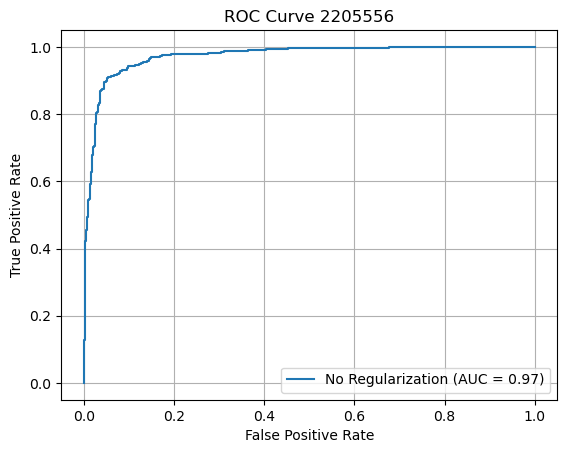

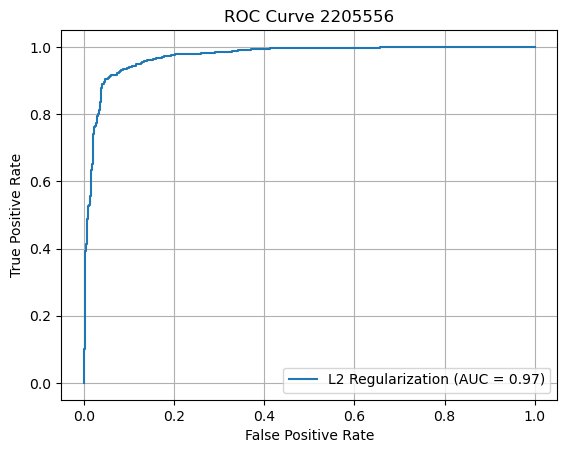

NameError: name 'pickle' is not defined

In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
spambase = fetch_ucirepo(id=94)
X = spambase.data.features
y = spambase.data.targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_value = auc(fpr, tpr)
    return acc, conf_matrix, precision, recall, specificity, f1, fpr, tpr, auc_value

model_none = LogisticRegression(penalty=None, max_iter=1000, solver='lbfgs')
model_none.fit(X_train, y_train)
metrics_none = evaluate_model(model_none, X_test, y_test)


model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, C=1.0)
model_l2.fit(X_train, y_train)
metrics_l2 = evaluate_model(model_l2, X_test, y_test)



def display_metrics(name, metrics):
    print(f"\n{name}:")
    print(f"Accuracy: {metrics[0] * 100:.2f}%")
    print("Confusion Matrix:")
    print(metrics[1])
    print(f"Precision: {metrics[2]:.2f}")
    print(f"Recall: {metrics[3]:.2f}")
    print(f"Specificity: {metrics[4]:.2f}")
    print(f"F1 Score: {metrics[5]:.2f}")
    print(f"AUC: {metrics[8]:.2f}")
    plt.figure()
    plt.plot(metrics[6], metrics[7], label=f"{name} (AUC = {metrics[8]:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve 2205556")
    plt.legend(loc="lower right")
    plt.grid()

display_metrics("No Regularization", metrics_none)
display_metrics("L2 Regularization", metrics_l2)

plt.show()
with open("logistic_model_none.pkl", "wb") as file:
    pickle.dump(model_none, file)

with open("logistic_model_l2.pkl", "wb") as file:
    pickle.dump(model_l2, file)

print("Models saved successfully!")


NONE Regularization:
Accuracy: 90.80%
Confusion Matrix:
[[  0  46]
 [  0 454]]
Precision: 0.91
Recall (Sensitivity): 1.00
Specificity: 0.00
F1 Score: 0.95
AUC Score: 1.00

L1 Regularization:
Accuracy: 90.80%
Confusion Matrix:
[[  0  46]
 [  0 454]]
Precision: 0.91
Recall (Sensitivity): 1.00
Specificity: 0.00
F1 Score: 0.95
AUC Score: 0.07

L2 Regularization:
Accuracy: 90.80%
Confusion Matrix:
[[  0  46]
 [  0 454]]
Precision: 0.91
Recall (Sensitivity): 1.00
Specificity: 0.00
F1 Score: 0.95
AUC Score: 1.00

ELASTICNET Regularization:
Accuracy: 90.80%
Confusion Matrix:
[[  0  46]
 [  0 454]]
Precision: 0.91
Recall (Sensitivity): 1.00
Specificity: 0.00
F1 Score: 0.95
AUC Score: 0.73


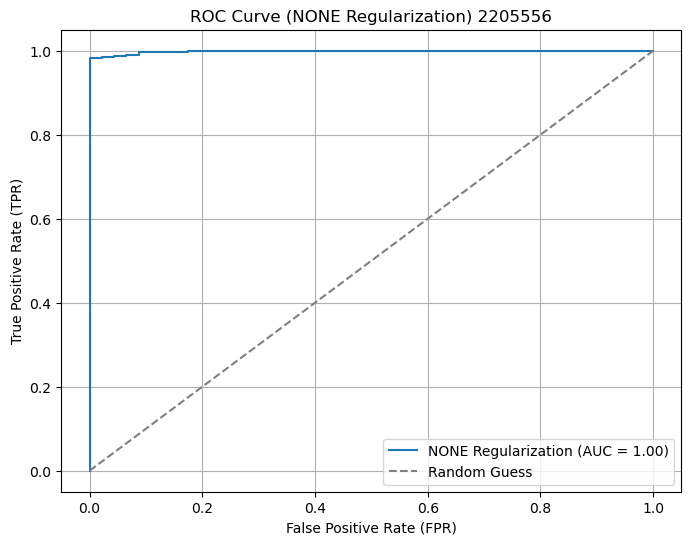

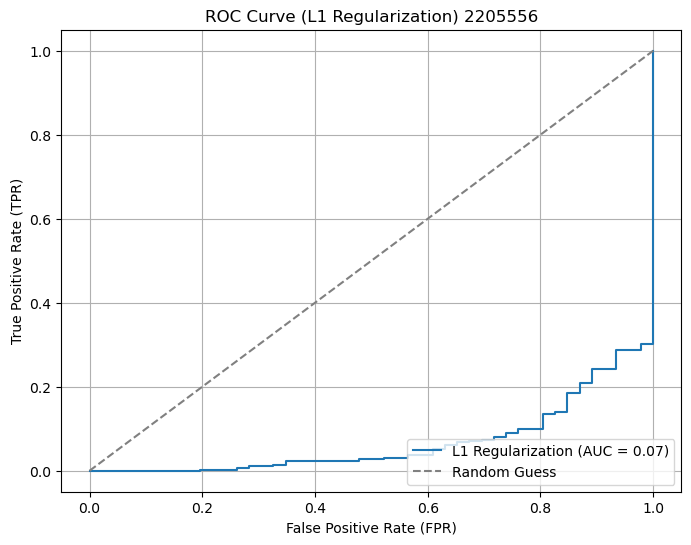

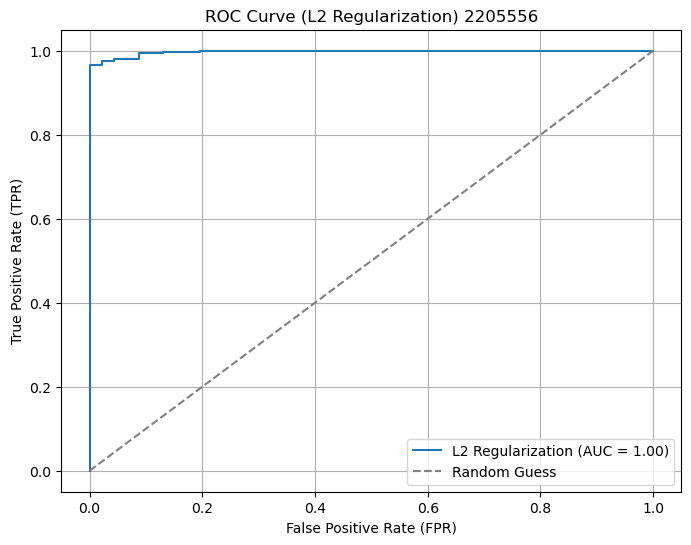

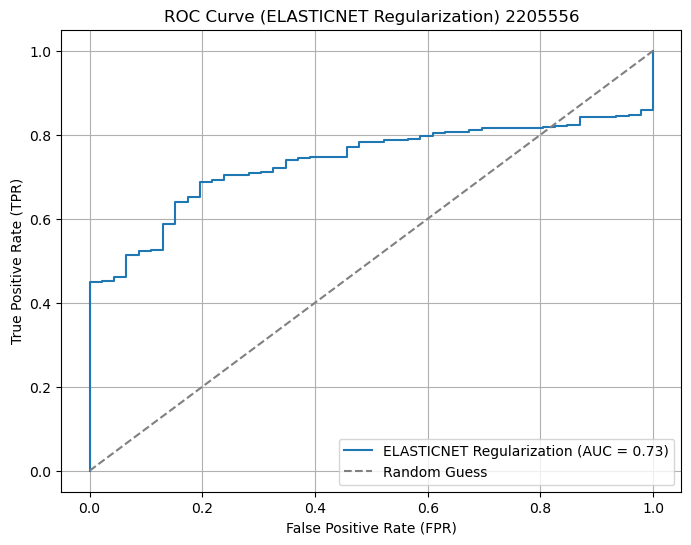

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate=0.1, epochs=1000, penalty=None, lambda_param=0.1):
    m, n = X.shape
    weights = np.zeros(n)
    biases = 0
    
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + biases
        predictions = sigmoid(linear_model)
        
        dw = (1 / m) * np.dot(X.T, (predictions - y))
        db = (1 / m) * np.sum(predictions - y)
    
        if penalty == 'l1': 
            dw += lambda_param * np.sign(weights)
        elif penalty == 'l2': 
            dw += lambda_param * weights
        elif penalty == 'elasticnet':  
            dw += lambda_param * np.sign(weights) + lambda_param * weights
        
        weights -= learning_rate * dw
        biases -= learning_rate * db
    
    return weights, biases

def predict(X, weights, biases):
    linear_model = np.dot(X, weights) + biases
    return sigmoid(linear_model)
def evaluate_metrics(y_true, y_pred_prob, threshold=0.5):
    y_pred = (y_pred_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    tp = conf_matrix[1, 1]  
    fp = conf_matrix[0, 1]  
    fn = conf_matrix[1, 0]  
    tn = conf_matrix[0, 0]  

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc_value = auc(fpr, tpr)
    
    return accuracy, conf_matrix, precision, recall, specificity, f1, auc_value, fpr, tpr

np.random.seed(42)
n_samples = 500
X = np.random.rand(n_samples, 2)
X = np.hstack((np.ones((X.shape[0], 1)), X))  
true_weights = np.array([0.5, 2.0, -1.0])  
linear_combination = np.dot(X, true_weights)
y_true = (sigmoid(linear_combination) > 0.5).astype(int)

penalties = ['none', 'l1', 'l2', 'elasticnet']
lambda_param = 0.1  

for penalty in penalties:
    weights, biases = logistic_regression(X, y_true, penalty=penalty, lambda_param=lambda_param)
    y_pred_prob = predict(X, weights, biases)
    accuracy, conf_matrix, precision, recall, specificity, f1, auc_value, fpr, tpr = evaluate_metrics(y_true, y_pred_prob)

    print(f"\n{penalty.upper()} Regularization:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC Score: {auc_value:.2f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{penalty.upper()} Regularization (AUC = {auc_value:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
    plt.title(f"ROC Curve ({penalty.upper()} Regularization) 2205556")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid()

plt.show()